<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/HW5/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [1]:
# -- import libraries here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pylab as plt

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [2]:
# -- your code here 
RE = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

In [3]:
RE.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [4]:
# -- your code here 
RE["log_distance_nearest_MRT_station"] = np.log10(RE.distance_nearest_MRT_station)

In [5]:
RE.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [6]:
# -- your code here
feat = RE[["log_distance_nearest_MRT_station"]]
targ = RE['house_price_unit_area']
feat_s = (feat - feat.mean())/feat.std()
targ_s = (targ - targ.mean())/targ.std()

Using the code library of your choice, fit a linear regression model to the data

In [7]:
# -- your code here
mlr = LinearRegression()
mlr.fit(feat_s,targ_s)

LinearRegression()

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [8]:
# -- your code here
adj_r2 = 1 - (1-mlr.score(feat_s, targ_s))*(len(targ_s)-1)/(len(targ_s)-feat_s.shape[1]-1)
print('The r2 of the model is {0:.3f}'.format(mlr.score(feat_s,targ_s)))
print('The adjusted r2 of the model is {0:.3f}'.format(adj_r2))

The r2 of the model is 0.539
The adjusted r2 of the model is 0.538


# <mark>WFF</mark> Very good.

Print the coefficient (slope) of the line

In [9]:
# -- your code here
print("The Coefficient of the line is {0:.3f}".format(mlr.coef_[0]))

The Coefficient of the line is -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

***After looking at the coefficient we can say that there is a negative correlation between the distance to the nearest MRT station and the price of the house.*** 

# <mark>WFF</mark> Very good.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

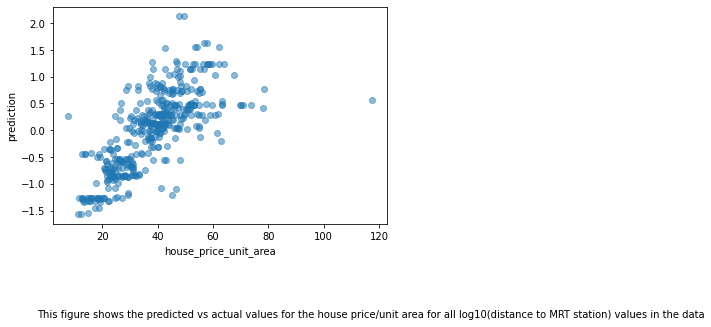

In [10]:
# -- your code here
prediction1 = mlr.predict(feat_s)
plt.plot(targ, prediction1,"o",alpha = 0.5)
plt.xlabel('house_price_unit_area')
plt.ylabel('prediction')
plt.text(-3.5,-3.5, "This figure shows the predicted vs actual values for the house price/unit area for all log10(distance to MRT station) values in the data");

# <mark>WFF</mark> This figure is good, though you may want to add another sentence that explains the significance of the plot. Still though, this is good :)

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [11]:
RE.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


In [12]:
# -- your code here
feats = RE[["convenience_stores","log_distance_nearest_MRT_station", "house_age", "transaction_date"]]
targs = RE['house_price_unit_area']
feats_s = (feats - feats.mean())/feats.std()
targs_s = (targs - targs.mean())/targs.std()

Using the code library of your choice, fit a multiple linear regression model to the data

In [13]:
# -- your code here
mlrs = LinearRegression()
mlrs.fit(feats_s,targs_s)

LinearRegression()

Print the coefficients of each of the features

In [14]:
# -- your code here
print("The Coefficient for convenience stores is {0:.3f}".format(mlrs.coef_[0]))
print("The Coefficient for log_distance_nearest_MRT_station is {0:.3f}".format(mlrs.coef_[1]))
print("The Coefficient for house_age is {0:.3f}".format(mlrs.coef_[2]))
print("The Coefficient for transaction_date is {0:.3f}".format(mlrs.coef_[3]))

The Coefficient for convenience stores is 0.137
The Coefficient for log_distance_nearest_MRT_station is -0.643
The Coefficient for house_age is -0.177
The Coefficient for transaction_date is 0.152


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

*You can claim that the relative correlation between convience stores and transaction date and house price is positive,and negative for distance to the nearest MRT station, and house age.*

Print the $R^2$ of this model

In [15]:
# -- your code here
print('The r2 of the model is {0:.3f}'.format(mlrs.score(feats_s,targs_s)))

The r2 of the model is 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*Yes I would say that the model has improved with the addition of the remaining features because in task one the R^2 was at 54% and now it is at around 60%.*

Print the Adjusted-$R^2$ of this model

In [16]:
# -- your code here
adjs_r2 = 1 - (1-mlrs.score(feats_s, targs_s))*(len(targs_s)-1)/(len(targs_s)-feats_s.shape[1]-1)
print('The adjusted r2 of the model is {0:.3f}'.format(adjs_r2))

The adjusted r2 of the model is 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*Yes i would say that the model has improved with the addition of the remaining features because the R^2 and adjusted R^2 have both increased from task one.*

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

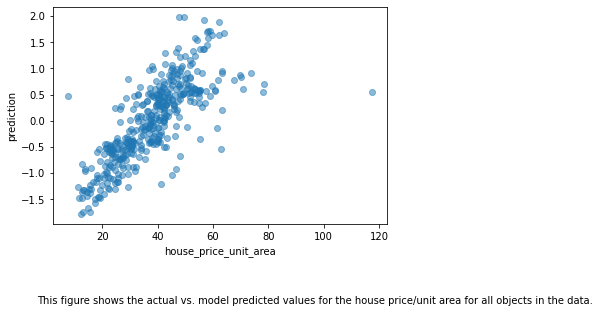

In [17]:
# -- your code here
prediction2 = mlrs.predict(feats_s)
plt.plot(targs, prediction2,"o",alpha = 0.5)
plt.xlabel('house_price_unit_area')
plt.ylabel('prediction')
plt.text(-3.5,-3.5, "This figure shows the actual vs. model predicted values for the house price/unit area for all objects in the data.");

*The visible improvement that I am noticing from task one is that the points on the graph seem to be more condensed leaving me to beleive that a more accurate regression is present.*